## 2.4.1 conditional probability

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../sensor_data/sensor_data_600.txt', delimiter=' ', names=['date','time','ir','lidar'])

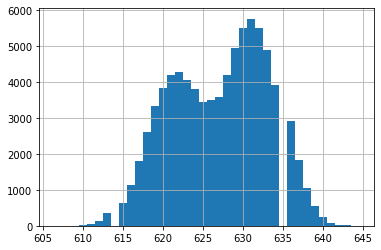

In [28]:
data['lidar'].hist(bins=max(data['lidar']) - min(data['lidar']), align='left')

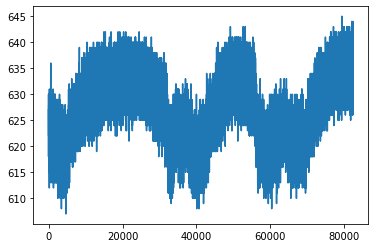

In [29]:
data.lidar.plot()

In [30]:
data

,date,time,ir,lidar
0,20180202,110001,28,627
1,20180202,110004,17,626
2,20180202,110007,14,627
3,20180202,110010,31,622
4,20180202,110013,24,630
...,...,...,...,...
82296,20180205,84216,39,634
82297,20180205,84220,13,637
82298,20180205,84222,37,633
82299,20180205,84225,36,633


In [31]:
data["hour"] = [e//10000 for e in data.time]
d = data.groupby('hour')

In [32]:
d

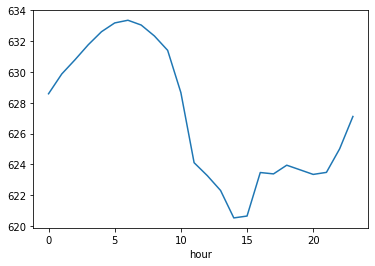

In [33]:
d.lidar.mean().plot()

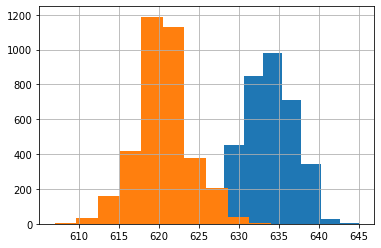

In [34]:
d.lidar.get_group(6).hist()
d.lidar.get_group(14).hist()

## 2.4.2 

In [35]:
# create data frame for each hour
each_hour = {i:d.lidar.get_group(i).value_counts().sort_index() for i in range(24)}
each_hour

{0: 618      3
 619     18
 620     32
 621     46
 622     85
 623    132
 624    179
 625    252
 626    308
 627    316
 628    365
 629    361
 630    338
 631    342
 632    250
 633    213
 634    128
 636     71
 637     57
 638     30
 639     11
 640      1
 641      1
 642      1
 Name: lidar, dtype: int64,
 1: 619      4
 620      6
 621     13
 622     18
 623     44
 624     80
 625    150
 626    221
 627    267
 628    377
 629    422
 630    467
 631    396
 632    371
 633    254
 634    205
 636    121
 637     71
 638     25
 639     13
 640      5
 641      1
 642      1
 Name: lidar, dtype: int64,
 2: 619      1
 620      3
 621      3
 622      7
 623     19
 624     45
 625     75
 626    124
 627    171
 628    312
 629    426
 630    471
 631    470
 632    424
 633    369
 634    279
 636    172
 637     91
 638     42
 639     14
 640      8
 641      2
 642      1
 Name: lidar, dtype: int64,
 3: 620      1
 622      2
 623      3
 624     16
 625     38
 626

In [36]:
freqs = pd.concat(each_hour, axis=1)
freqs

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,NaN,NaN,1.0,1.0,11.0,NaN,NaN,NaN
611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,10.0,NaN,NaN,NaN,2.0,6.0,12.0,4.0,NaN
612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.0,26.0,NaN,3.0,3.0,5.0,21.0,16.0,2.0,1.0
613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.0,53.0,2.0,15.0,5.0,18.0,56.0,36.0,9.0,2.0
615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,107.0,86.0,2.0,17.0,22.0,31.0,81.0,84.0,39.0,4.0
616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,161.0,149.0,18.0,49.0,49.0,84.0,142.0,115.0,49.0,7.0
617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,256.0,241.0,42.0,104.0,76.0,135.0,182.0,189.0,84.0,12.0


In [37]:
freqs = freqs.fillna(0)
freqs

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,4.0,0.0,0.0,1.0,1.0,11.0,0.0,0.0,0.0
611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,10.0,0.0,0.0,0.0,2.0,6.0,12.0,4.0,0.0
612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,26.0,0.0,3.0,3.0,5.0,21.0,16.0,2.0,1.0
613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51.0,53.0,2.0,15.0,5.0,18.0,56.0,36.0,9.0,2.0
615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,107.0,86.0,2.0,17.0,22.0,31.0,81.0,84.0,39.0,4.0
616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,161.0,149.0,18.0,49.0,49.0,84.0,142.0,115.0,49.0,7.0
617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,256.0,241.0,42.0,104.0,76.0,135.0,182.0,189.0,84.0,12.0


In [38]:
probs = freqs/len(freqs)
probs

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.027027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.027027,0.000000,0.000000,0.000000,0.000000,0.000000,0.027027,0.027027,0.000000,0.000000
609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.054054,0.000000,0.000000,0.000000,0.000000,0.000000,0.027027,0.027027,0.000000
610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.081081,0.108108,0.000000,0.000000,0.027027,0.027027,0.297297,0.000000,0.000000,0.000000
611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.324324,0.270270,0.000000,0.000000,0.000000,0.054054,0.162162,0.324324,0.108108,0.000000
612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.486486,0.702703,0.000000,0.081081,0.081081,0.135135,0.567568,0.432432,0.054054,0.027027
613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.378378,1.432432,0.054054,0.405405,0.135135,0.486486,1.513514,0.972973,0.243243,0.054054
615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.891892,2.324324,0.054054,0.459459,0.594595,0.837838,2.189189,2.270270,1.054054,0.108108
616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.351351,4.027027,0.486486,1.324324,1.324324,2.270270,3.837838,3.108108,1.324324,0.189189
617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.918919,6.513514,1.135135,2.810811,2.054054,3.648649,4.918919,5.108108,2.270270,0.324324


### draw the distribution

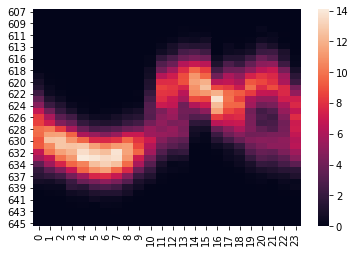

In [41]:
import seaborn as sns
sns.heatmap(probs)

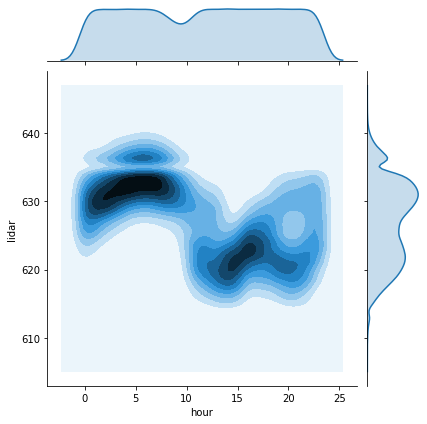

In [43]:
sns.jointplot(data["hour"], data["lidar"], data, kind = "kde") #kde: kernel density estimation(ref:https://seaborn.pydata.org/introduction.html)